<a href="https://colab.research.google.com/github/CakeNuthep/Pytorch_Learning/blob/main/PyTorch_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การติดตั้ง

In [34]:
import torch

In [35]:
print(torch.__version__)

1.7.0+cu101


# การใช้ง่าน Tensor ใน PyTorch

In [36]:
x = torch.rand(3,4,dtype = torch.float32)
dtype = print(x)

tensor([[2.2825e-01, 2.3981e-01, 4.7952e-01, 3.7433e-01],
        [6.7050e-01, 5.8854e-04, 8.5629e-01, 9.3167e-01],
        [8.8915e-01, 9.9795e-01, 2.0167e-01, 2.8718e-01]])


In [37]:
x = torch.zeros(5,3, dtype= torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [38]:
x = x.new_ones(5,3,dtype=torch.float64)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [39]:
x = torch.tensor([4.123,3])
print(x)

tensor([4.1230, 3.0000])


In [40]:
x = torch.randn_like(x, dtype=torch.float32)   #result has the same size
print(x)

tensor([0.7584, 0.3172])


In [41]:
x = torch.Tensor(5,3).fill_(7)
print(x)

tensor([[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]])


In [42]:
x = torch.Tensor(5,3).fill_(7).type(torch.int)
print(x)

tensor([[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]], dtype=torch.int32)


In [43]:
torch.manual_seed(1)
x = torch.randn(5,3)
print(x)

tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661],
        [-1.5228,  0.3817, -1.0276],
        [-0.5631, -0.8923, -0.0583],
        [-0.1955, -0.9656,  0.4224]])


In [44]:
import numpy as np
np_array = np.array([2,3])
t = torch.Tensor(np_array)
print(t)

tensor([2., 3.])


# การคำนวณ

In [45]:
t1 = torch.ones(5,3)
print("t1")
print(t1)

t2 = torch.zeros(5,3)
print("t2")
print(t2)

print("t1+t2")
print(t1+t2)

print("t1-t2")
print(t1-t2)

print("t1*t2")
print(t1*t2)

t1
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t2
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
t1+t2
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t1-t2
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t1*t2
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


## Dot Product

In [46]:
t1 = torch.ones(5,3)
t2 = torch.Tensor(3,5).fill_(2)
print("t1")
print(t1)

print("t2")
print(t2)

print("dot product")
print(torch.matmul(t1,t2))

t1
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t2
tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
dot product
tensor([[6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.]])


In [47]:
t = torch.ones(5,3)
print(t.mean()) # ได้ tensor(1.)
print(t.sum()) # ได้ tensor(15.)
print(t.std()) # ได้ tensor(0.)
print(t.max())
print(t.min())

tensor(1.)
tensor(15.)
tensor(0.)
tensor(1.)
tensor(1.)


# Neural Network

## อนุพันธ์

In [48]:
x = torch.ones(1,5)
w = torch.Tensor(5,1).fill_(2)

w.requires_grad = True
y = torch.matmul(x,w)

y.backward()
print(y.grad)
print(w.grad)
print(x.grad)

None
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## การสร้าง Layer

In [49]:
linear_layer = torch.nn.Linear(2,3)

In [50]:
linear_layer.weight

Parameter containing:
tensor([[ 0.4667, -0.6443],
        [-0.6723, -0.3411],
        [ 0.6209, -0.1178]], requires_grad=True)

In [51]:
import torch
import torch.nn.functional as F

class TestNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(TestNeuralNetwork,self).__init__()
        self.linearLayer1 = torch.nn.Linear(2,3)
        self.linearLayer2 = torch.nn.Linear(3,3)
        self.linearLayer3 = torch.nn.Linear(3,2)
    
    def forward(self,x):
        h1 = self.linearLayer1(x)
        a1 = F.relu(h1)
        h2 = self.linearLayer2(a1)
        a2 = F.relu(h2)
        h3 = self.linearLayer3(a2)
        return h3

nn = TestNeuralNetwork()
print(nn)


TestNeuralNetwork(
  (linearLayer1): Linear(in_features=2, out_features=3, bias=True)
  (linearLayer2): Linear(in_features=3, out_features=3, bias=True)
  (linearLayer3): Linear(in_features=3, out_features=2, bias=True)
)


In [52]:
nn = TestNeuralNetwork()

input = torch.Tensor([1,1])
output = nn(input) #จะทำการเรียก Method ที่ชื่อว่า Forward
print(output)

tensor([ 0.1346, -0.3193], grad_fn=<AddBackward0>)


## ทดสอบสร้าง Neural Network สำหรับการจำแนกข้อมูลออกเป็น 2 กลุ่ม

## จำลองข้อมูล

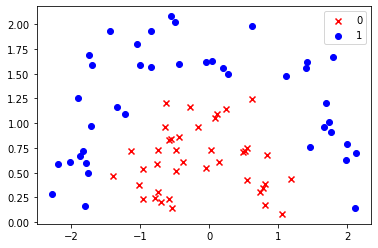

In [53]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(2).repeat(40) #กำหนดให้มี 2 สีจำนวนสีละ 40 จุด
r = np.random.normal(z+1,0.25) #กำหนดรัศมีให้ห่างกันในแต่ละสี
t = np.random.uniform(0,np.pi,80) #สุ่มค่าตั้งแต่ 0 ถึงค่า pi
x = r*np.cos(t)
y = r*np.sin(t)
input = np.array([x,y]).T

plt.scatter(x[z==0],y[z==0],marker="x",color='r',label="0")
plt.scatter(x[z==1],y[z==1],marker="o",color='b',label="1")
plt.legend()
plt.show()

## สร้าง Neural Network

In [54]:
import torch
import torch.nn.functional as F

class TestNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(TestNeuralNetwork,self).__init__()
        self.linearLayer1 = torch.nn.Linear(2,3)
        self.linearLayer2 = torch.nn.Linear(3,3)
        self.linearLayer3 = torch.nn.Linear(3,2)
    
    def forward(self,x):
        h1 = self.linearLayer1(x)
        a1 = F.relu(h1)
        h2 = self.linearLayer2(a1)
        a2 = F.relu(h2)
        h3 = self.linearLayer3(a2)
        return h3



input = torch.Tensor(input)  #แปลงเป็นค่า X ให้อยู่ใน Tensor
label = torch.LongTensor(z) #แปลงเป็นค่า z ให้อยู่ใน Tensor
nn = TestNeuralNetwork() 

## Train

In [55]:
optimizer = torch.optim.Adam(nn.parameters(),lr=0.1)  # สร้าง Optimizer แบบวิธี Adam พร้อมทั้งต้องระบุว่าจะให้ Opimizer ปรับค่า Weight ในตัวแปรชื่อว่า nn
cross_entropy = torch.nn.CrossEntropyLoss()

In [56]:

for i in range(200): #วนลูปเพื่อทำการ train
    a = nn(input)
    output = cross_entropy(a,label)
    output.backward()
    optimizer.step()      #ให้ Optimizer ทำการปรับค่า Weight
    optimizer.zero_grad() #ปรับให้ grad มีค่าเป็น 0 เพราะหากไม่ปรับค่าเป็น 0 ในการคำนวณรอบต่อไป grad จะกลายเป็นค่าที่บวกจากของเก่าเพิ่มขึ้นเรื่อยๆ

## วาดกราฟแสดงผล

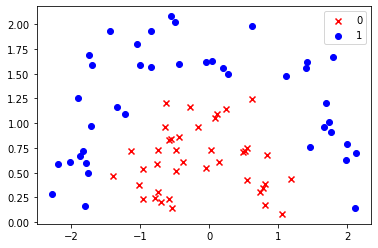

In [57]:
predict_z = nn(input)
predict_z = predict_z.argmax(1)

# plt.scatter(x,y,c=predict_z,edgecolor='k')

plt.scatter(x[predict_z==0],y[predict_z==0],marker="x",color='r',label="0")
plt.scatter(x[predict_z==1],y[predict_z==1],marker="o",color='b',label="1")
plt.legend()
plt.show()